In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [4]:
df = pd.read_csv("newest_appdata10.csv")

In [5]:
y = df.enrolled

In [6]:
X = df.drop(columns = 'enrolled')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=101)

In [9]:
train_identifier = X_train['user']

In [10]:
X_train = X_train.drop(columns='user')

In [11]:
test_identifier = X_test['user']

In [12]:
X_test = X_test.drop(columns='user')

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_X = StandardScaler()

In [15]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test2 = pd.DataFrame(sc_X.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Amri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [17]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
4166,0,14,24,15,0,0,0,0,0,1,...,0,0,0,0,0,11,0,0,0,1
29644,1,16,22,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
27558,1,0,59,4,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
11222,1,22,19,43,0,0,0,1,1,0,...,0,0,0,0,0,15,0,0,0,3
5671,4,23,26,6,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [18]:
X_train2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
4166,-1.488205,0.191736,-0.715297,-0.386484,-0.347328,-0.456933,-0.444971,-1.036672,-0.645858,0.954580,...,-0.120447,-0.116762,-0.1161,-0.090226,-0.087801,1.311136,-0.259928,-0.764073,-0.288962,0.309741
29644,-0.996229,0.460664,-0.899979,-1.148545,-0.347328,2.188504,-0.444971,-1.036672,-0.645858,-1.047581,...,-0.120447,-0.116762,-0.1161,-0.090226,-0.087801,-1.692846,-0.259928,0.054781,-0.288962,0.309741
27558,-0.996229,-1.690763,2.516650,-1.085040,-0.347328,-0.456933,-0.444971,-1.036672,-0.645858,-1.047581,...,-0.120447,-0.116762,-0.1161,-0.090226,-0.087801,-0.600489,-0.259928,-0.764073,-0.288962,-1.164689
11222,-0.996229,1.267450,-1.177003,1.391659,-0.347328,-0.456933,-0.444971,0.964625,1.548327,-1.047581,...,-0.120447,-0.116762,-0.1161,-0.090226,-0.087801,2.403493,-0.259928,-0.764073,-0.288962,3.258601
5671,0.479702,1.401914,-0.530614,-0.958030,-0.347328,2.188504,-0.444971,-1.036672,1.548327,-1.047581,...,-0.120447,-0.116762,-0.1161,-0.090226,-0.087801,-1.419757,-0.259928,-0.764073,-0.288962,0.309741


In [19]:
X_train = X_train2
X_test = X_test2

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
classifier = LogisticRegression(random_state = 0, penalty='l1')

In [23]:
classifier.fit(X_train, y_train)

C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [26]:
cm = confusion_matrix(y_test, y_pred)

In [27]:
accuracy_score(y_test, y_pred)

0.7743

In [28]:
precision_score(y_test, y_pred)

0.7750747756729811

In [29]:
recall_score(y_test, y_pred)

0.7749202551834131

In [30]:
f1_score(y_test, y_pred)

0.7749975077260493

Test Data Accuracy: 0.7743


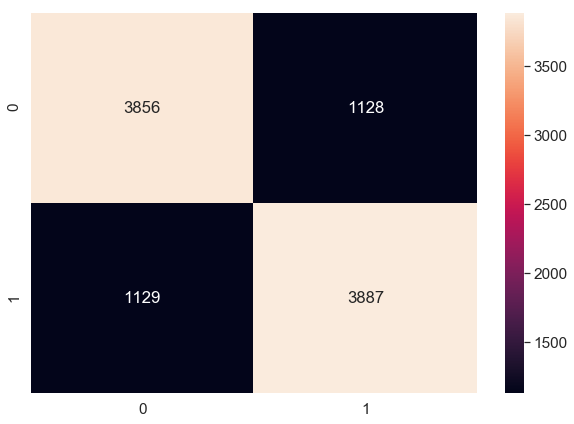

In [33]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10)

C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [36]:
print("Logistic Accuracy %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()*2))

Logistic Accuracy 0.767 (+/- 0.013)


In [37]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,354413,1,1
1,230883,1,0
2,41909,0,0
3,305601,0,1
4,295675,0,0
5,348770,0,0
6,169182,0,1
7,23022,0,0
8,338369,1,1
9,231507,0,0
